# Loan Data from Prosper
## by Ali Rafieh

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [140]:
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.shape

(113937, 81)

In [141]:
# number of columns with empty values:
columns_empty = 0
for i in loan_data.columns:
    if loan_data[i].count() < 113937:
        columns_empty += 1
columns_empty

43

### What is the structure of your dataset?

The size of dataset is 113937x81 and most columns are numeric. 43 columns have empty data. 

### What is/are the main feature(s) of interest in your dataset?

I am going to figure out between income, credit score, numbers of inquiries and be home owner which one has most effect on term, rate and amount of loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Based on our interest (mentioned in previous question), following columns has been selected wich are related to investigation:
'Term', 'BorrowerAPR','BorrowerRate', 'EmploymentStatus', 'AvailableBankcardCredit', 'IsBorrowerHomeowner','CreditScoreRangeLower', 'CreditScoreRangeUpper', 'InquiriesLast6Months', 'TotalInquiries','IncomeRange', 'LoanOriginalAmount'

In [142]:
# first I create a dataset based on columns which are doing to use in investigation process
selected_columns = ['Term', 'BorrowerAPR','BorrowerRate', 'EmploymentStatus',
                    'IsBorrowerHomeowner','CreditScoreRangeLower', 'CreditScoreRangeUpper', 'InquiriesLast6Months', 
                    'TotalInquiries','IncomeRange', 'LoanOriginalAmount']
loan_select_data = loan_data.loc[:,selected_columns]

## Univariate Exploration

After selecting our interest columns, I am going to investigate each variable to find out outliers and clean dataset. In other hand our concentration on this part is investigate dataset to knowing data, datatypes and their outliers.

In [143]:
loan_select_data.describe()

,Term,BorrowerAPR,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,InquiriesLast6Months,TotalInquiries,LoanOriginalAmount
count,113937.000000,113912.000000,113937.000000,113346.000000,113346.000000,113240.000000,112778.000000,113937.00000
mean,40.830248,0.218828,0.192764,685.567731,704.567731,1.435085,5.584405,8337.01385
std,10.436212,0.080364,0.074818,66.458275,66.458275,2.437507,6.429946,6245.80058
min,12.000000,0.006530,0.000000,0.000000,19.000000,0.000000,0.000000,1000.00000
25%,36.000000,0.156290,0.134000,660.000000,679.000000,0.000000,2.000000,4000.00000
50%,36.000000,0.209760,0.184000,680.000000,699.000000,1.000000,4.000000,6500.00000
75%,36.000000,0.283810,0.250000,720.000000,739.000000,2.000000,7.000000,12000.00000
max,60.000000,0.512290,0.497500,880.000000,899.000000,105.000000,379.000000,35000.00000


As shown in dataset description, there are some quality issues that need to be fix:
1. minimum lower and upper credit scores are 0 and 19 and maximum of them, respectively, are 880 and 899. These numbers are not valid and accurate, because credit score is between 300 to 850.
2. 105 inquiries in last 6 month or 379 total inquiry, seems kinf of outlier not accurate and maybe not valid

There are some tidiness issues that need to be address:
1. After fixing quality issues, is needed to create a new column name CreditScore and put mean of 'CreditScoreRangeLower' and 'CreditScoreRangeUpper' on that.
2. This new CreditScore column need to categorized and ordered in categories from 300 to 850 in 5 ordinal categories base on [Experian](https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/): 'Very Poor',  'Fair', 'Good', 'Very Good', 'Exceptional' 

After each  figure, we discuss more on outlier.

In order to figure out relation between dataset variables, and see how rate and amount of loan affected by other variables, it is important to all rows have values. So, I am going to drop rows with null values

In [144]:
# as we need all columns have values, I drop any rows with missing data
loan_select_data = loan_select_data.dropna(axis = 0 , how = 'any')

In [145]:
# creating new 'CreditScore' by putting mean of 'CreditScoreRangeLower' and 'CreditScoreRangeUpper' on that
loan_select_data['CreditScore'] = (loan_select_data.CreditScoreRangeLower + loan_select_data.CreditScoreRangeUpper)/2

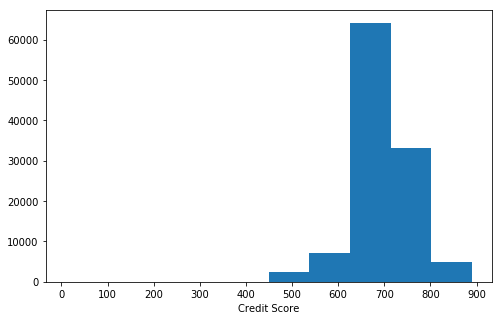

In [146]:
# now checking credit score oulier
plt.figure(figsize=[8, 5])
plt.hist(data = loan_select_data, x = 'CreditScore')
x_ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('Credit Score')
plt.show()

It is possible based on different credit inquiries from different institutes, maybe during past times, to credit score be more than 850. So, credit scores more than 850 and less than 900 can be valid but not consistence. As all credit score, in dataset, are less than 900, we can replace them with 850.

In [147]:
loan_select_data['CreditScore'] = loan_select_data['CreditScore'].replace(
    loan_select_data.loc[loan_select_data['CreditScore'] > 850].CreditScore, 850)

In [148]:
# test
loan_select_data.loc[loan_select_data['CreditScore'] > 850]

,Term,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,InquiriesLast6Months,TotalInquiries,IncomeRange,LoanOriginalAmount,CreditScore


In [149]:
# dropping columns 'CreditScoreRangeLower' and 'CreditScoreRangeUpper'
loan_select_data = loan_select_data.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis =1)

As histogram skewed to left, there small outlier at beginning, lets find out them:

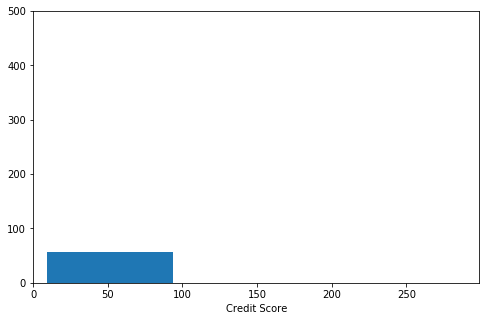

In [150]:
# lets see credit score less than 300
plt.figure(figsize=[8, 5])
plt.hist(data = loan_select_data, x = 'CreditScore')
plt.xlim([0, 299])
plt.ylim([0, 500])
plt.xlabel('Credit Score')
plt.show()

There are some outlier credit score data less than 100 and seems there are mistake in input data. I am going to drop these rows rather than replace them with 300 to prevent noise and mistake in dataset

In [151]:
score_drop_index = loan_select_data.loc[loan_select_data.CreditScore < 300].index
loan_select_data = loan_select_data.drop(score_drop_index, axis = 0)

Now, we can categorized 'CreditScore' column based on following ordinal ctegories:
- __'Very Poor'__ :from 300 to 579
- __'Fair'__ : from 580 to 669
- __'Good'__ : from 670 to 739
- __'Very Good'__ : from 740 to 799
- __'Exceptional'__: from 800 to 850

In [152]:
# first creating the bins
credit_bins_edges = [300, 579, 669, 739, 799, 850]
credit_bins_name = ['Very Poor',  'Fair', 'Good', 'Very Good', 'Exceptional']
loan_select_data['CreditScoreLevels'] = pd.cut(loan_select_data['CreditScore'], credit_bins_edges, 
                                               labels = credit_bins_name, include_lowest  = True)

In [208]:
# now order CreditScoreLevels from low to high
credit_bins_name = ['Very Poor',  'Fair', 'Good', 'Very Good', 'Exceptional']
credit_level = pd.api.types.CategoricalDtype(ordered = True, categories = credit_bins_name )
loan_select_data['CreditScoreLevels'] = loan_select_data['CreditScoreLevels'].astype(credit_level)

In [154]:
# drop CreditScore column
loan_select_data = loan_select_data.drop('CreditScore', axis = 1)

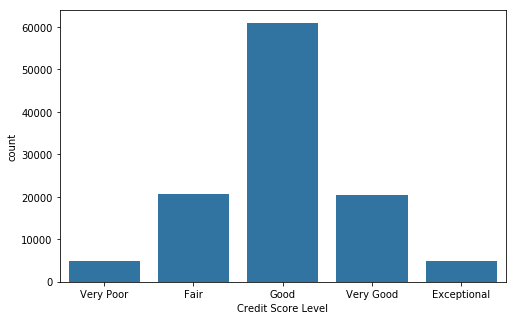

In [155]:
# now lets to see again what is look like 'CreditScoreLevels':
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_select_data, x = 'CreditScoreLevels', color = base_color)
plt.xlabel('Credit Score Level');

We change a quantitative variable to a nominal category variable, so use countplot and as shown, figure is symmetry. Most data concentrate in 'Good' credit score level, and as is expected in normal distro, mode and mean locate in center, here 'Good'.

Next, look at two important variables for borrower and lender, loan rate and loan APR:

In [156]:
loan_select_data[['BorrowerAPR', 'BorrowerRate']].describe()

,BorrowerAPR,BorrowerRate
count,111537.000000,111537.000000
mean,0.219280,0.192881
std,0.080484,0.074887
min,0.006530,0.000000
25%,0.156290,0.134000
50%,0.209970,0.184000
75%,0.284880,0.250600
max,0.423950,0.360000


In [157]:
# as data shown, data are not in percentage in these two collumns, so first
# changing values in 'BorrowerRate' and 'BorrowerAPR' to percentage
loan_select_data[['BorrowerRate', 'BorrowerAPR']] = loan_select_data[['BorrowerRate', 'BorrowerAPR']]*100

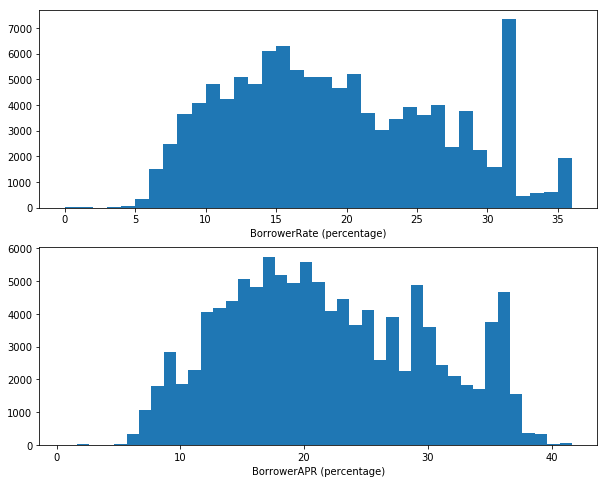

In [158]:
# after cleaned all rows without values, plot the distribution of 'BorrowerRate' and 'BorrowerAPR'.
fig, ax = plt.subplots(nrows=2, figsize = [10,8])

variables = ['BorrowerRate', 'BorrowerAPR']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loan_select_data[var]), max(loan_select_data[var])+0.1, 1)
    ax[i].hist(data = loan_select_data, x = var, bins = bins)
    ax[i].set_xlabel('{} (percentage)'.format(var))

plt.show()

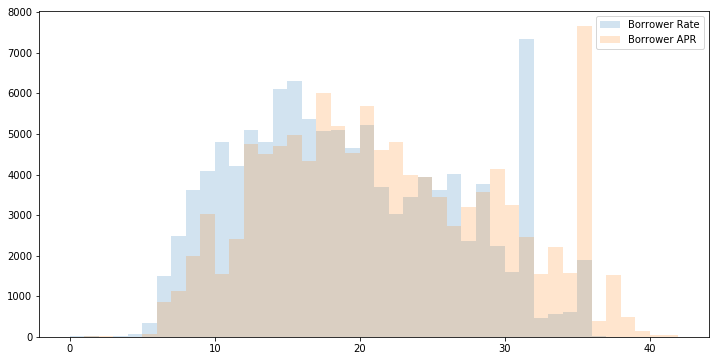

In [159]:
# after cleaned all rows without values, plot the distribution of 'BorrowerRate' and 'BorrowerAPR'.
plt.figure(figsize = [12,6])

bins = np.arange(min(loan_select_data.BorrowerRate), max(loan_select_data.BorrowerAPR)+0.1, 1)
plt.hist(data = loan_select_data, x = 'BorrowerRate', alpha = 1/5, bins = bins)
plt.hist(data = loan_select_data, x = 'BorrowerAPR', alpha = 1/5, bins = bins)
labels= ['Borrower Rate', 'Borrower APR']
plt.legend(labels);

BorrowerRate and BorrowerAPR histograms are pretty same. BorrowerRateare a tiny skwed to left and BorrowerAPR skewed to right. But most difference are in their second hit bimodal, for BorrowerRate it is near 32% and for BorrowerAPR 36%. Both have some outlier between 0 to 5% and for BorrowerAPR is after 40%. this outlier is not effect on BorrowerRate and BorrowerAPR histagrams, so we can tolarete them in bivariate and multivariate diagrams.

Next, let’s look at percentage of homeowner in our dataset.

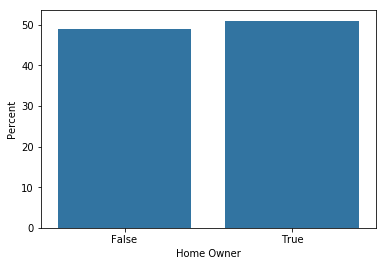

In [160]:
base_color = sb.color_palette()[0]
ax = sb.barplot(x = 'IsBorrowerHomeowner' , y ='IsBorrowerHomeowner', data =loan_select_data,
                estimator=lambda x: len(x) / len(loan_select_data) * 100, color = base_color)
ax.set(ylabel="Percent")
ax.set(xlabel = "Home Owner");

The number of Homeowner are pretty same near 50%, they are normal and we expect clearly shows their effect of other variables.

Next we investigate inquiries variables:

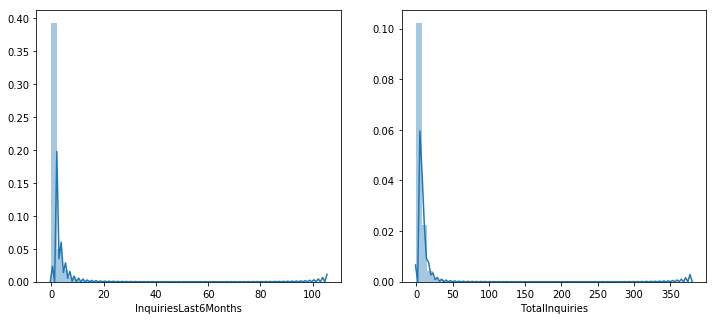

In [161]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize = [12,5])

# plt.subplot(1,2,1)
sb.distplot(loan_select_data['InquiriesLast6Months'], ax=ax[0]);

# plt.subplot(1,2,2)
sb.distplot(loan_select_data['TotalInquiries'], ax=ax[1]);

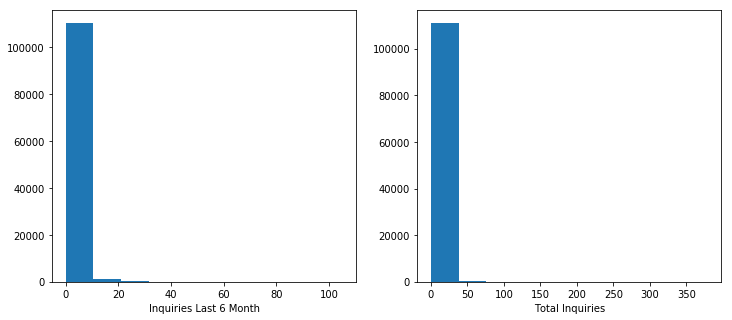

In [162]:
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
bins = np.arange(min(loan_select_data.InquiriesLast6Months), max(loan_select_data.InquiriesLast6Months)+1, 1)
plt.hist(data = loan_select_data, x = 'InquiriesLast6Months')
plt.xlabel('Inquiries Last 6 Month');

plt.subplot(1,2,2)
bins = np.arange(min(loan_select_data.TotalInquiries), max(loan_select_data.TotalInquiries)+1, 1)
plt.hist(data = loan_select_data, x = 'TotalInquiries')
plt.xlabel('Total Inquiries');

As both figures show, 'InquiriesLast6Months' and 'TotalInquiries' are skewed to right with long tail, from 20 to more than 100 and from 40 to more than 350, respectivly. Accpeting these tailes need some domain knowledge. As I searched, I couldn't find limitation on numbers of inquiries per month or per year, but too many inquiries in a periode of time hase huge effect on your credit score. So, after looking a close look to inquiries period, check their credit score level to find out how is situation.

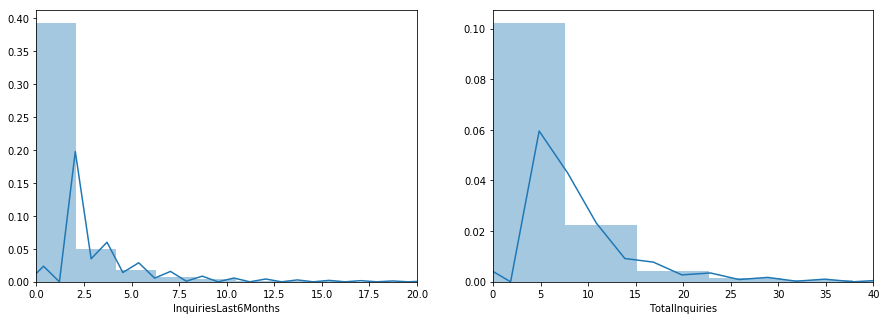

In [163]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.xlim([0, 20])
sb.distplot(loan_select_data['InquiriesLast6Months']);

plt.subplot(1,2,2)
plt.xlim([0,40])
sb.distplot(loan_select_data['TotalInquiries']);

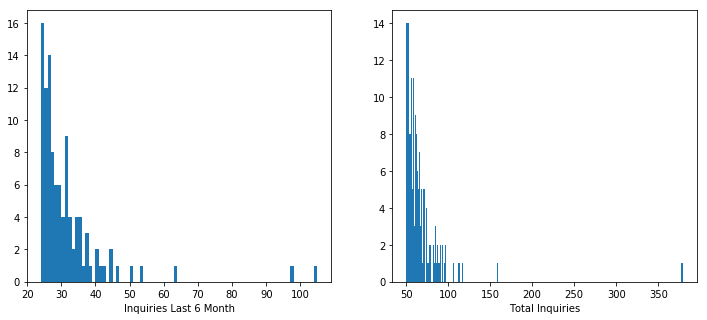

In [164]:
plt.figure(figsize = [12,5])

plt.subplot(1,2,1)
bin_6 = np.arange(24, max(loan_select_data.InquiriesLast6Months)+1, 1)
plt.hist(data = loan_select_data, x = 'InquiriesLast6Months', bins = bin_6)
plt.xlabel('Inquiries Last 6 Month');

plt.subplot(1,2,2)
bin_total = np.arange(50, max(loan_select_data.TotalInquiries)+1, 1)
plt.hist(data = loan_select_data, x = 'TotalInquiries', bins = bin_total)
plt.xlabel('Total Inquiries');

In [165]:
loan_select_data.loc[loan_select_data.InquiriesLast6Months > 20].groupby(
    'CreditScoreLevels')['InquiriesLast6Months'].count()

CreditScoreLevels
Very Poor      92
Fair           56
Good           30
Very Good       2
Exceptional     0
Name: InquiriesLast6Months, dtype: int64

In [166]:
loan_select_data.loc[loan_select_data.TotalInquiries > 50].groupby(
    'CreditScoreLevels')['TotalInquiries'].count()

CreditScoreLevels
Very Poor      77
Fair           70
Good           41
Very Good       2
Exceptional     0
Name: TotalInquiries, dtype: int64

In [167]:
loan_select_data.loc[(loan_select_data.TotalInquiries > 50) | (loan_select_data.InquiriesLast6Months > 20)].groupby(
    'CreditScoreLevels')['TotalInquiries'].count()

CreditScoreLevels
Very Poor      127
Fair           100
Good            59
Very Good        4
Exceptional      0
Name: TotalInquiries, dtype: int64

So, as generally can be expect high number of inquiries are decrease credit score, by the way, as data are valid, I just removed 'InquiriesLast6Months' bigger than 20 and 'TotalInquiries' bigger than 50 to prevent long tails for both variables.

In [168]:
loan_select_data = loan_select_data.drop(
loan_select_data.loc[(loan_select_data.TotalInquiries > 50) | (loan_select_data.InquiriesLast6Months > 20)].index)

Now, let’s check another variable 'EmploymentStatus'. This variable is a nominal category.

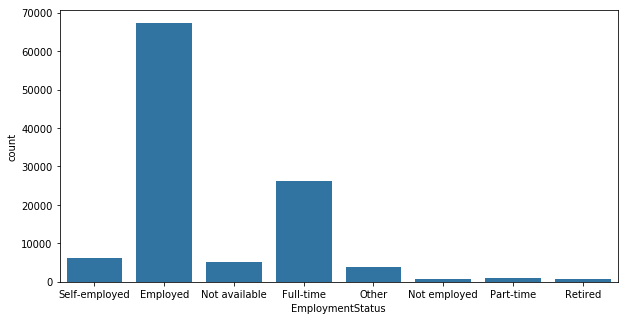

In [169]:
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_select_data, x = 'EmploymentStatus', color = base_color);

As one of item we want to see its effect on numeric variable like loan rate and loan amount is borrowers status of employment, and because in this categorical variable, we can't fill 'Not available' values with some predefine, so in order to figure out clear picture of relations between variable, rows with 'Not available' values has been dropped.

In [170]:
loan_select_data = loan_select_data.drop(
    loan_select_data.loc[loan_select_data.EmploymentStatus == 'Not available'].index)

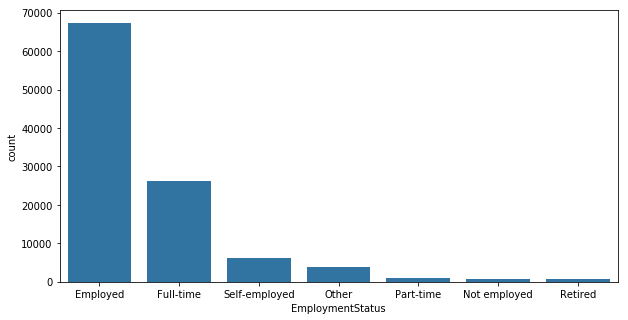

In [171]:
# now let check again and order 'EmploymentStatus' based on frequently

plt.figure(figsize = [10,5])
sb.countplot(data = loan_select_data, x = 'EmploymentStatus', color = base_color, 
             order = loan_select_data.EmploymentStatus.value_counts().index);

The graph shows in dataset 'Employed' status has the biggest group in this column, and after that full-time and the rest. But one ambiguity here is definition of these categories, for example all 'Full-time', 'Self_employed' and 'Part-time' can be part of the 'Employment' group. So, maybe more narrow categories and definitions for them, would be more helpful in respect of meaningful data categorizing.

Next variable is 'IncomeRange' which is nominal categorical variable. We can first order the column and then figure them.

In [172]:
# first see the values
loan_select_data.IncomeRange.value_counts()

$25,000-49,999    32136
$50,000-74,999    30996
$100,000+         17297
$75,000-99,999    16888
$1-24,999          7256
Not employed        804
$0                  611
Not displayed       136
Name: IncomeRange, dtype: int64

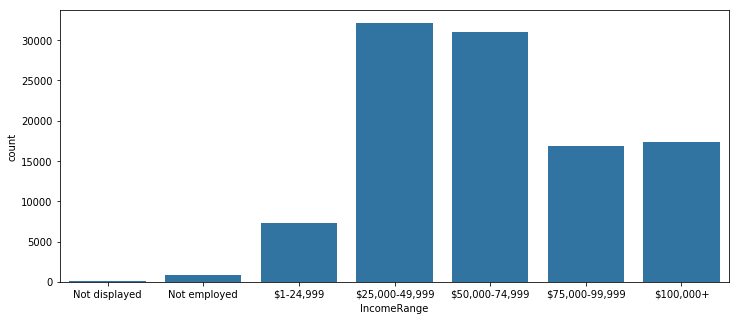

In [173]:
income_order = ['Not displayed', 'Not employed','$1-24,999', '$25,000-49,999', '$50,000-74,999',
                '$75,000-99,999','$100,000+']
income_level = pd.api.types.CategoricalDtype(ordered = True, categories = income_order )
loan_select_data['IncomeRange'] = loan_select_data['IncomeRange'].astype(income_level)

plt.figure(figsize = [12,5])
sb.countplot(data = loan_select_data, x = 'IncomeRange', color = base_color);

Biggest income groups are borrower income between 25k-49.9k and 50k-74.9k. Borrower with 100k+ income a slice is bigger than 75k-99.9k and standing in third place. Based the same reason for 'EmploymentStatus', because we want to see effect of variable on other vars specially numeric vars, I prefer to remove 'IncomeRange' with 'Not displayed' values.

In [174]:
loan_select_data = loan_select_data.drop(loan_select_data.loc[loan_select_data.IncomeRange == 'Not displayed'].index)

In [175]:
# test drop
loan_select_data.IncomeRange.value_counts()

$25,000-49,999    32136
$50,000-74,999    30996
$100,000+         17297
$75,000-99,999    16888
$1-24,999          7256
Not employed        804
Not displayed         0
Name: IncomeRange, dtype: int64

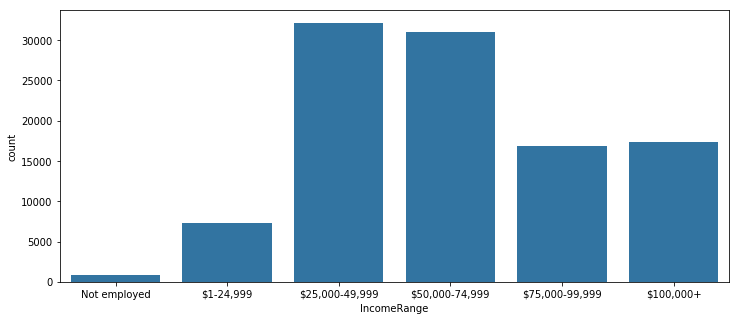

In [176]:
# order and figure 'IncomeRange' column again
income_order = ['Not employed','$1-24,999', '$25,000-49,999', '$50,000-74,999',
                '$75,000-99,999','$100,000+']
income_level = pd.api.types.CategoricalDtype(ordered = True, categories = income_order )
loan_select_data['IncomeRange'] = loan_select_data['IncomeRange'].astype(income_level)

plt.figure(figsize = [12,5])
sb.countplot(data = loan_select_data, x = 'IncomeRange', color = base_color);

Next variable we are going to figure out is 'LoanOriginalAmount' which shows amount of loan to borrowers. It is a numeric variable and kind of the most one to see effect of other vars on it. So, we use 'hist' plot first:

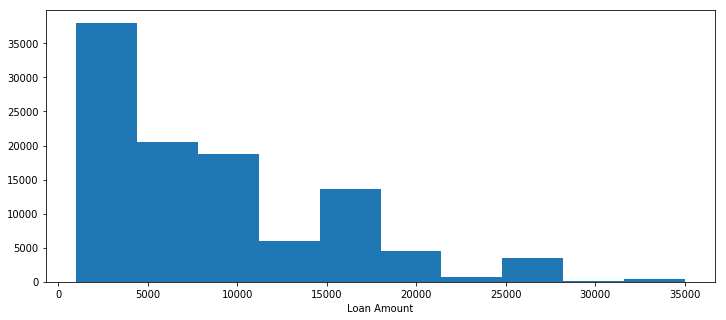

In [177]:
plt.figure(figsize=[12, 5])
plt.hist(data = loan_select_data, x = 'LoanOriginalAmount')
plt.xlabel('Loan Amount')
plt.show()

The graph skewed to right and because of big numbers of loan, it seems better use log distribution.

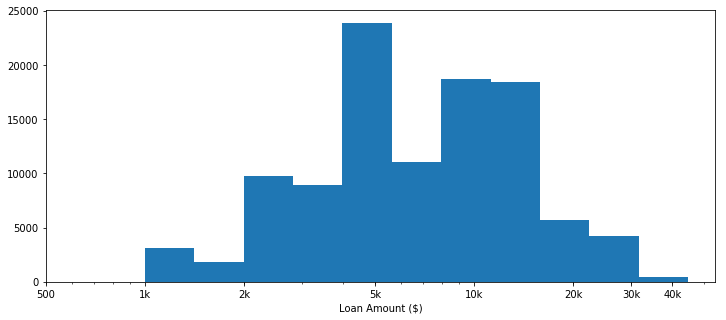

In [178]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.15
bins = 10 ** np.arange(3, np.log10(loan_select_data['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = loan_select_data, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4, 4e4], [500, '1k', '2k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('Loan Amount ($)')
plt.show()

Loan Amount has a long-tailed distribution, skewed right. When plotted on a log-scale, the loan amount distribution looks roughly bimodal, with one peak around 5k, and a second peak between 8.5k and 17k.

The last variable is 'Term'. 'Term' is the length of the loan expressed in months. It by nature is discreet quantitative variable, but we can look as nominal categorical variable, too.

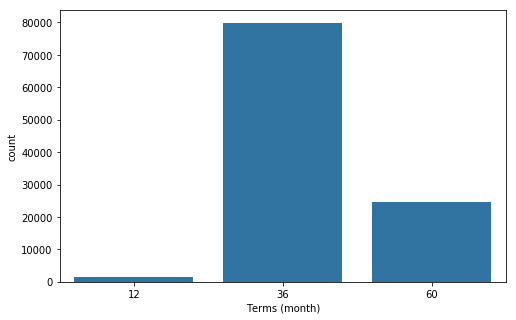

In [179]:
plt.figure(figsize=[8, 5])
sb.countplot(data = loan_select_data, x = 'Term', color = base_color)
plt.xlabel('Terms (month)')
plt.show()

Biggest 'Term' belonge to 36 months (near 80%), after that 60 and then 12.

In [181]:
# last check in dataframe for null values
pd.isnull(loan_select_data).sum()

Term                      0
BorrowerAPR               0
BorrowerRate              0
EmploymentStatus          0
IsBorrowerHomeowner       0
InquiriesLast6Months      0
TotalInquiries            0
IncomeRange             611
LoanOriginalAmount        0
CreditScoreLevels         0
dtype: int64

There are 611 null value in 'IncomeRange' column. As we put our policy in this dataset analysis to all columns have valid and accurate data, this null data, as long as we can find to fill them we true data, will be dropped.

In [184]:
loan_select_data = loan_select_data.drop(loan_select_data.loc[pd.isnull(loan_select_data.IncomeRange) == True].index)

In [247]:
# now lets save our clean datafram as loan_select_data.csv
loan_select_data.to_csv('loan_select_data.csv', index = False)

In [3]:
# I read again dataframe as name 'df' for comfortantly
df = pd.read_csv('loan_select_data.csv')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The only variable I used trasformation was 'LoanOriginalAmount'. Some variables like 'Borrowerrate' and 'BorrowerAPR' has log tails and I just cut them to reach a normal distribution and prevent of effect of outlier on our inferences

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


Most of process in this section helped for investigation and cleaning dataset. In some variables like 'EmploymentStatus' and 'IncomeRange' I removed 'Not displayed' and 'Not available' values in order to further analysis have clearer results. I changed 'CreditScoreLower' and "CreditScoreUpper' variables to one ordinal categorical variable

## Bivariate Exploration

First I look at relation between numeric variables, based on following lists. As said I put 'Term' in both numeric and categorical variables to check its relation with them.

In [188]:
numeric_vars = ['Term','BorrowerRate', 'BorrowerAPR', 'InquiriesLast6Months', 'TotalInquiries', 'LoanOriginalAmount']
categoric_vars = ['Term', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'CreditScoreLevels']

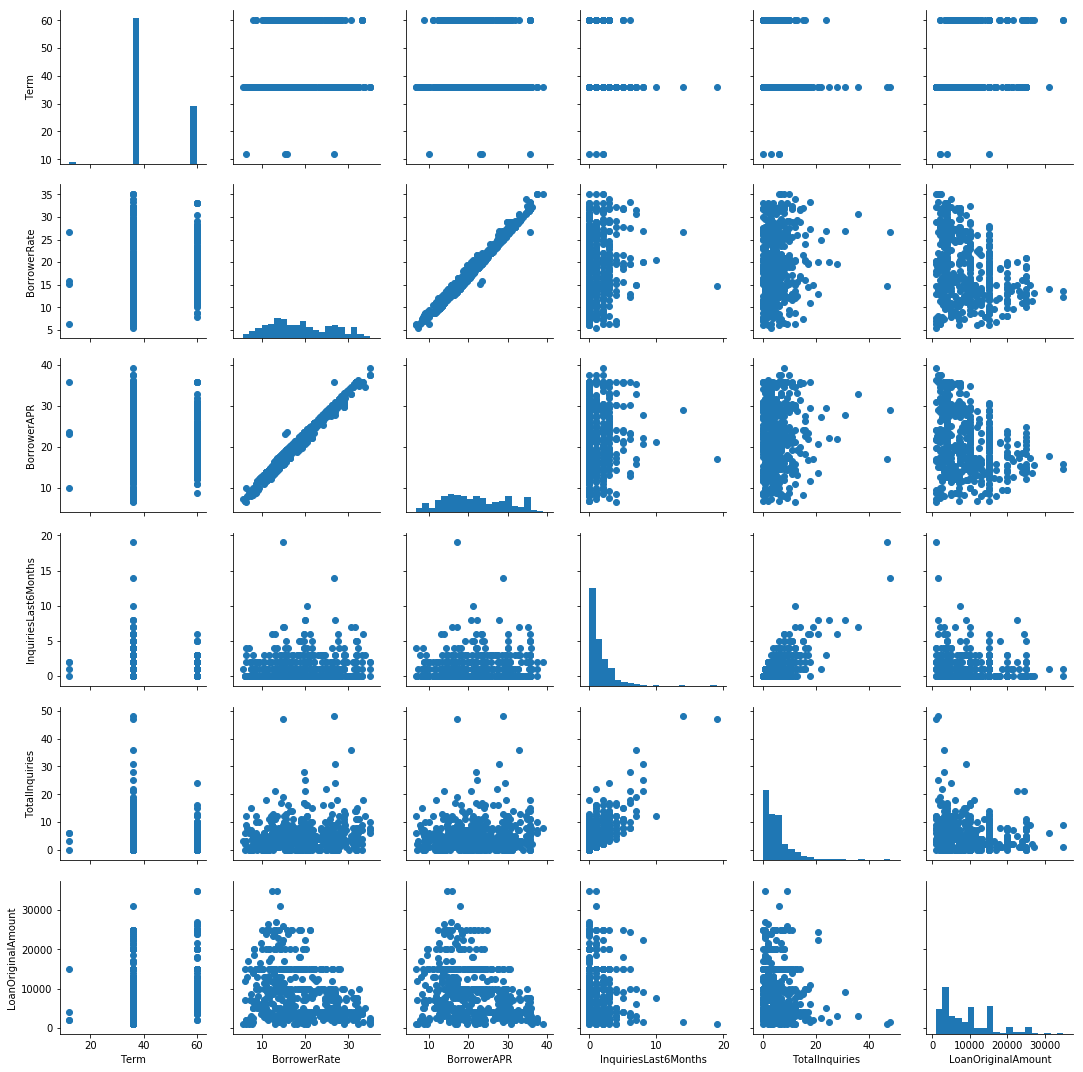

In [189]:
# plot matrix: sample 500 loan so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
loan_samp = df.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Numeric variables, don's show some sort of relation together. We can say thare is great relation between 'BorrowerRate' and 'BorrowerAPR' that is logical. 'TotalInquiries' and 'InquiriesLast6Months' have great correlation together too. maybe can be say it is shows kind of human behavior for people, because those used to take less inquiries more and less act during time.

Lets check correlation table of these variables

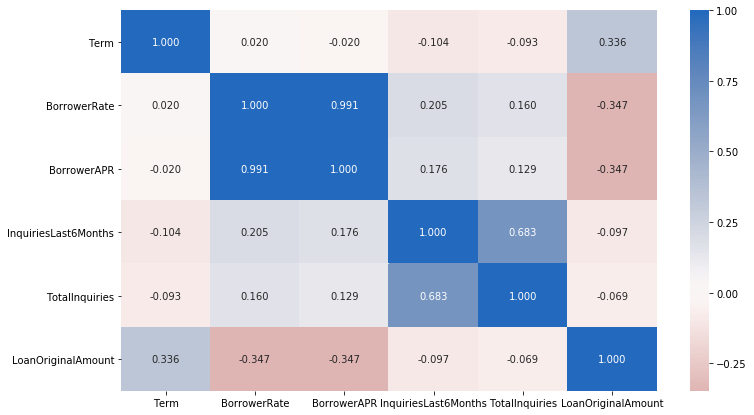

In [190]:
# correlation plot
plt.figure(figsize = [12, 7])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

lest more deep in to relation between these numeric variable to figure out those with negative correlation.  

In [196]:
bins_e = np.arange(min(df.LoanOriginalAmount), max(df.LoanOriginalAmount)+100, 500)
bins_c = bins_e[:-1] + 100

loan_binned = pd.cut(df['LoanOriginalAmount'], bins_e, include_lowest = True)
inquiries_mean = df['InquiriesLast6Months'].groupby(loan_binned).mean()
total_inquiries_mean = df['TotalInquiries'].groupby(loan_binned).mean()

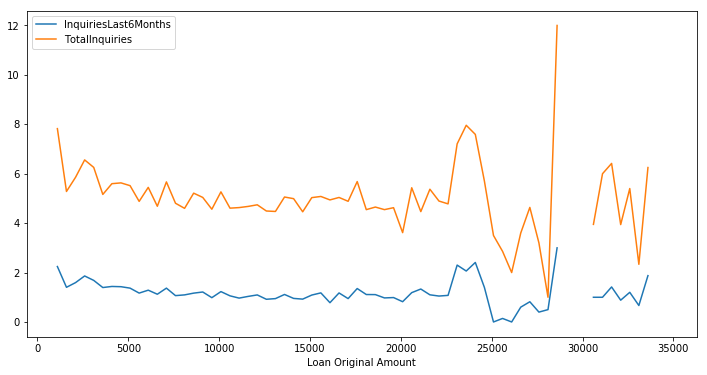

In [12]:
plt.figure(figsize = [12,6])
plt.errorbar(x = bins_c, y = inquiries_mean)
plt.errorbar(x = bins_c, y = total_inquiries_mean)
plt.legend()
plt.xlabel('Loan Original Amount');

We can't say there is kind of trend in this graph except same behave of two highly correlated variables, 'InquiriesLast6Months' and 'TotalInquiries', with 'LoanOriginalAmount' variable, same fluctuations on loan amount. Maybe we can say these two variables, 'InquiriesLast6Months' and 'TotalInquiries', put their effect on 'CreditScoreLevels' and 'CreditScoreLevels' related to 'LoanOriginalAmount'. In other hand, 'InquiriesLast6Months' and 'TotalInquiries'are not directly related to 'LoanOriginalAmount'.

So, let's check out theory:

In [4]:
credit_bins_name = ['Very Poor',  'Fair', 'Good', 'Very Good', 'Exceptional']
credit_level = pd.api.types.CategoricalDtype(ordered = True, categories = credit_bins_name )
df['CreditScoreLevels'] = df['CreditScoreLevels'].astype(credit_level)

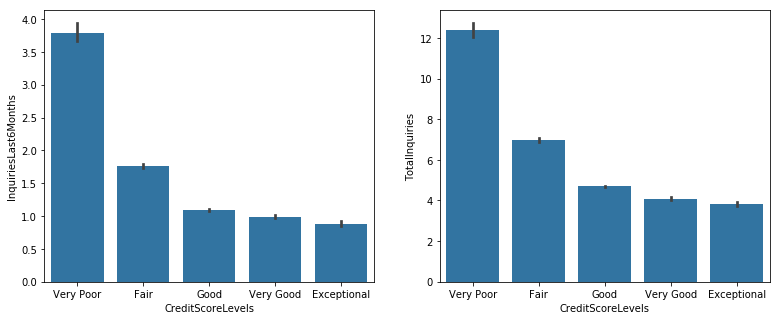

In [226]:
plt.figure(figsize= [13,5])
plt.subplot(1,2,1)
sb.barplot(data = df, x = 'CreditScoreLevels', y = 'InquiriesLast6Months', color = base_color)
plt.subplot(1,2,2)
sb.barplot(data = df, x = 'CreditScoreLevels', y = 'TotalInquiries', color = base_color);

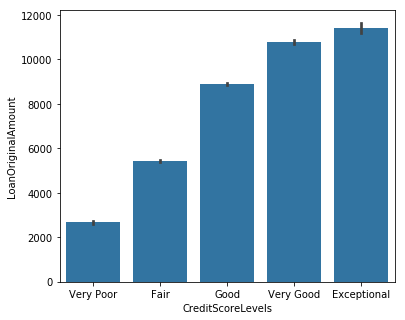

In [227]:
plt.figure(figsize= [6,5])
sb.barplot(data = df, x = 'CreditScoreLevels', y = 'LoanOriginalAmount', color = base_color);

So, first two graph shows there are great relation between 'InquiriesLast6Months', 'TotalInquiries' and 'CreditScoreLevels' and last graph shows average of loan amount increase with higher credit score. So, we can say 'InquiriesLast6Months' and 'TotalInquiries' has indirect effect on 'LoanOriginalAmount'.

Lest look how credit score related to term of loan:

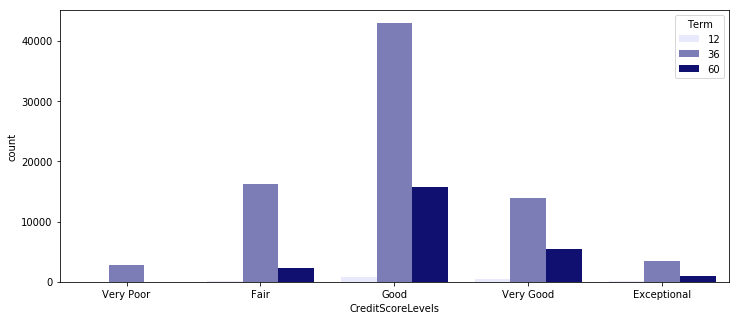

In [9]:
plt.figure(figsize= [12,5])
sb.countplot(data = df, x = 'CreditScoreLevels', hue = 'Term', color = 'navy');

The graph doesn’t show if borrower has higher credit score, has longer 'Term', because generally term of a loan mostly related to rate and APR. So. let’s look at relation of 'CredirScoreLevels' and 'Term' with 'BorrowerRate' and 'BorrowerAPR', also we are expecting as 'BorrowerRate' and 'BorrowerAPR' are highly correlated together behave very similar to 'CredirScoreLevels' and 'Term'.

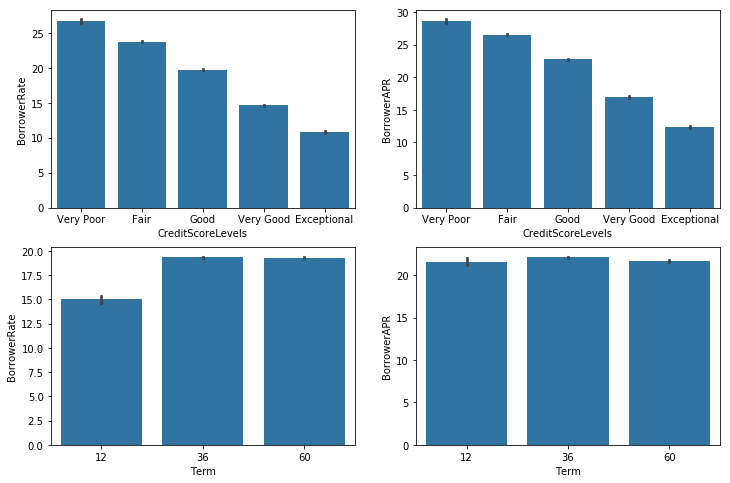

In [59]:
plt.subplots(figsize = [12,8])

plt.subplot(2,2,1)
sb.barplot(data = df, x = 'CreditScoreLevels', y = 'BorrowerRate', color = base_color)

plt.subplot(2,2,2)
sb.barplot(data = df, x = 'CreditScoreLevels', y = 'BorrowerAPR', color = base_color)

plt.subplot(2,2,3)
sb.barplot(data = df, x = 'Term', y = 'BorrowerRate', color = base_color);

plt.subplot(2,2,4)
sb.barplot(data = df, x = 'Term', y = 'BorrowerAPR', color = base_color);

'Term' shows a little sensitivity to 'BorrowerRate' and average of loan APR in each loan term are same, but with decreasing loan rate and APR, credit score gets higher levels. Another variable I am interested to see it behavior against numeric variables is 'IncomeRange'.

In [4]:
income_order = ['Not employed','$1-24,999', '$25,000-49,999', '$50,000-74,999',
                '$75,000-99,999','$100,000+']
income_level = pd.api.types.CategoricalDtype(ordered = True, categories = income_order )
df['IncomeRange'] = df['IncomeRange'].astype(income_level)

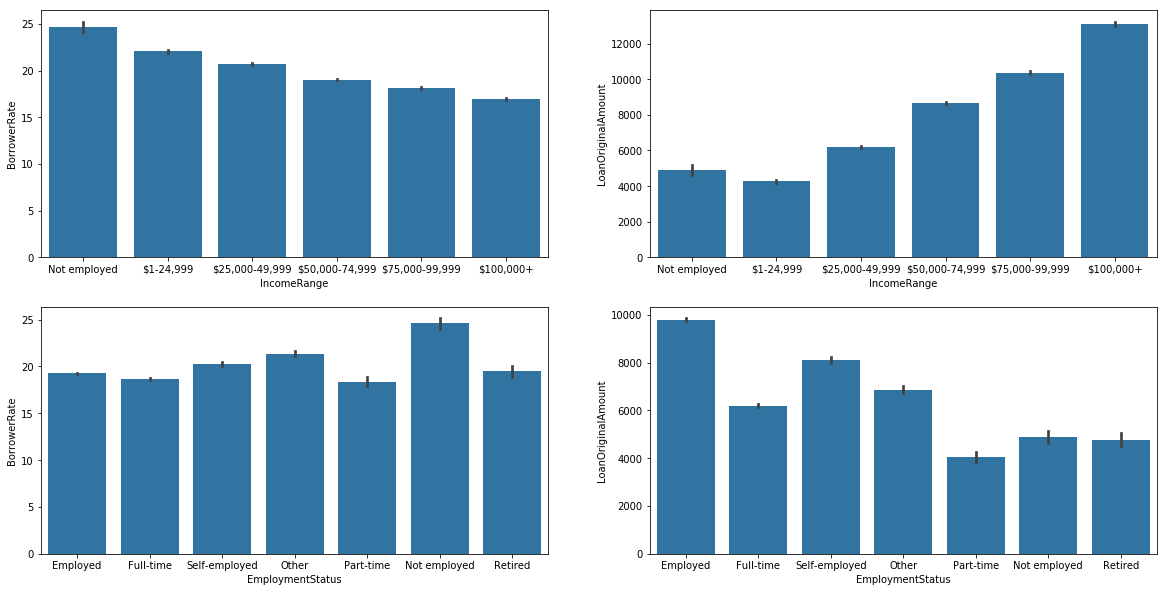

In [255]:
plt.subplots(figsize = [20,10])

plt.subplot(2,2,1)
sb.barplot(data = df, x = 'IncomeRange', y = 'BorrowerRate', color = base_color)

plt.subplot(2,2,2)
sb.barplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)

plt.subplot(2,2,3)
sb.barplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', color = base_color,
            order = df.EmploymentStatus.value_counts().index);

plt.subplot(2,2,4)
sb.barplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color = base_color,
            order = df.EmploymentStatus.value_counts().index);

As we expected, alongside of 'IncomeRabge' increase, 'BorrowerRate' goes down and 'LoanOriginalAmount' climbs up, with one exception for 'Not employed' category. This category in 'IncomeRange' is a slice bigger than its next category neighbour, '$1-24,999'. In other side for 'EmploymentStatus' there is one fact: if borrower fall in 'Employed' category, has lessloan rate and more loan amount. The wired thing here is 'Not employed' status in 'EmploymentStatus' has bigger average at loan amount than 'Part-time' and 'Retired' statuses.

Now, let's back to another negative correlation in quantitative heat map graph.

In [13]:
rate_mean = df['BorrowerRate'].groupby(loan_binned).mean()
apr_mean = df['BorrowerAPR'].groupby(loan_binned).mean()

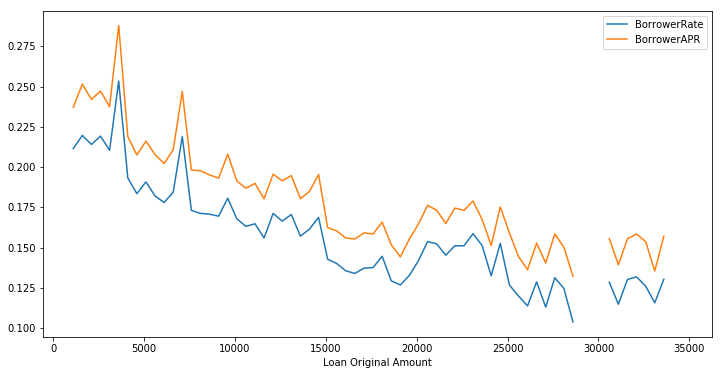

In [14]:
plt.figure(figsize = [12,6])
plt.errorbar(x = bins_c, y = rate_mean)
plt.errorbar(x = bins_c, y = apr_mean)
plt.xlabel('Loan Original Amount ($)')
plt.legend();

Both 'BorrowerRate' and 'BorrowerAPR' has similar behevior with 'LoanOriginalAmount' with some distance, clearly APR stands higher than Rate. Both have descending trend with a gap around average of $30k loan amount. Generally we can say with increasing loan amount, both loan rate and APR decrease.

Now let's look at situation of these categorical variables, 'IsBorrowerHomeowner', 'CreditScoreLevels'and 'IncomeRange', in counter of these quantitative variables: 'BorrowerRate','BorrowerAPR'and 'LoanOriginalAmount' to figure out how they are related together:

<Figure size 1080x1080 with 0 Axes>

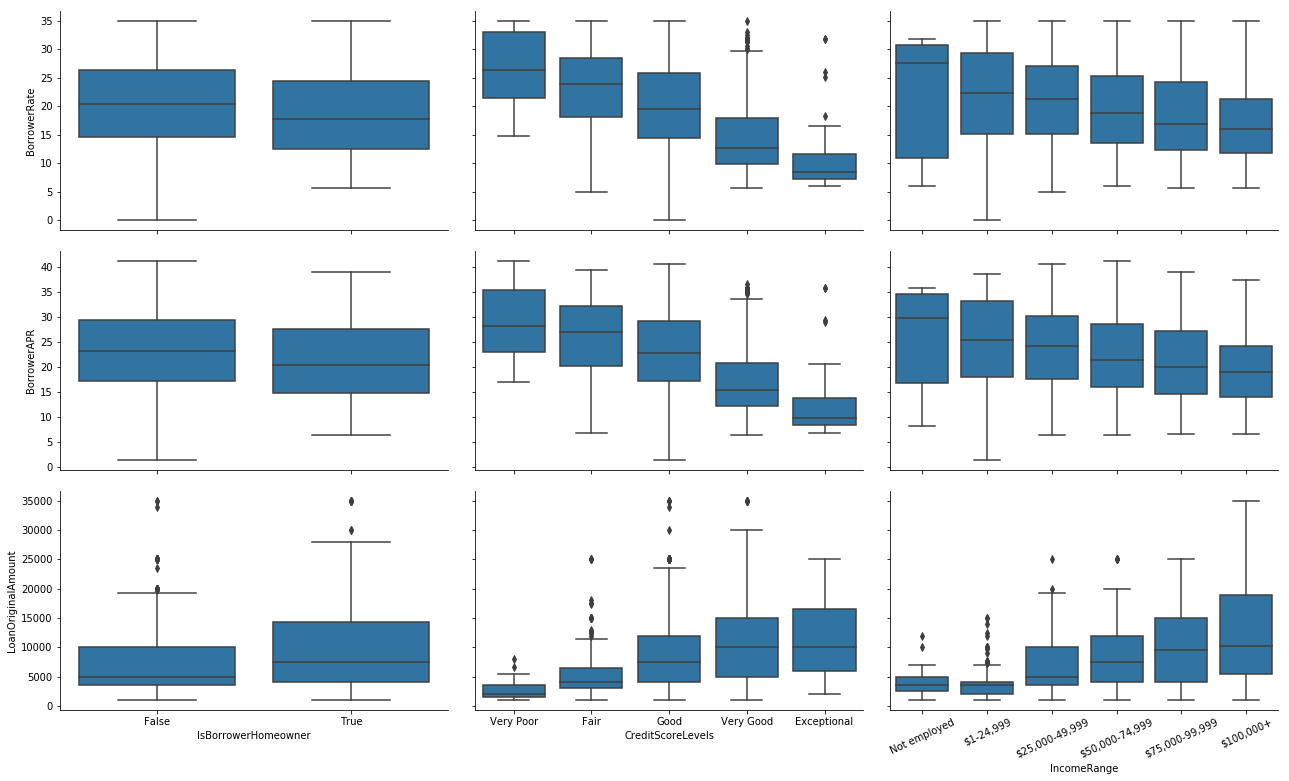

In [30]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df.shape[0], 2000, replace = False)
loan_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerRate','BorrowerAPR', 'LoanOriginalAmount'], 
                x_vars = ['IsBorrowerHomeowner', 'CreditScoreLevels', 'IncomeRange'], height = 3.5, aspect = 1.7)
g.map(boxgrid)
plt.xticks(rotation = 25)
plt.show();

As I look at graphs, can be said credit score is more related and effective on loan rate and APR, but income seems greater item for higher loan amount. Being homeowner it looks to has a little effect to loan amount, but not as effective as income and credit score

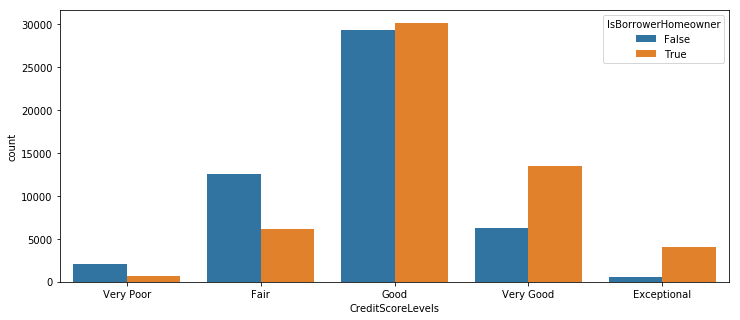

In [42]:
plt.figure(figsize = [12,5])
sb.countplot(data = df, x = 'CreditScoreLevels', hue = 'IsBorrowerHomeowner');

A symmetry situation, most borrower with 'Very Poor' value in ‘CreditScoreLevels’ haven't home but alongside increase in credit score levels, homeowner borrower goes up until fairly there are same in 'Good' value and after that they are bigger group up to 'Exceptional' which are the highest relatively group rather than borrower who don't have home.

But, how is the situation between credit score and income range? lets see

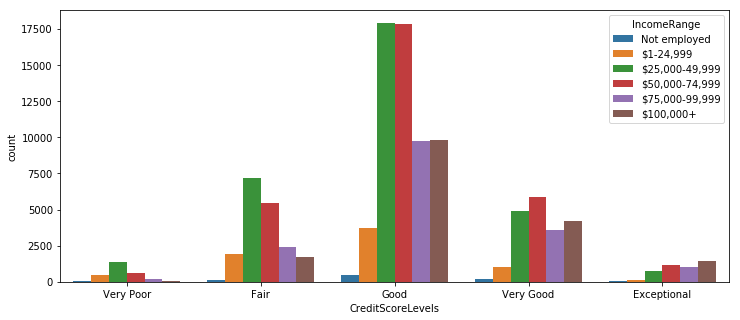

In [43]:
plt.figure(figsize = [12,5])
sb.countplot(data = df, x = 'CreditScoreLevels', hue = 'IncomeRange');

It is kind of normal graph. Interesting things is most borrower with 'Very Poor' and 'Fair' credit score values, fall in income range between $ 25k to 50k, maybe define as poverty loop, borrowers have job and their income average but not great credit score. It would be interesting to see do these borrowers, have higher inquiries? let's see

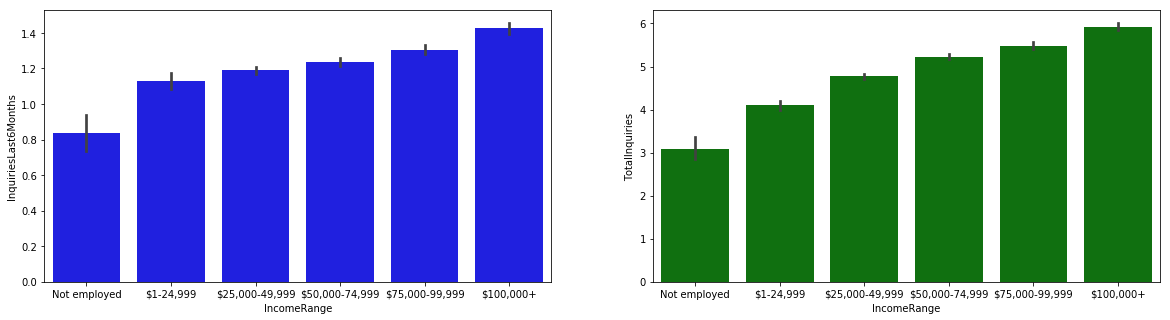

In [53]:
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
sb.barplot(data=df, x = 'IncomeRange', y = 'InquiriesLast6Months', color = 'blue')

plt.subplot(1,2,2)
sb.barplot(data=df, x = 'IncomeRange', y = 'TotalInquiries', color = 'green');

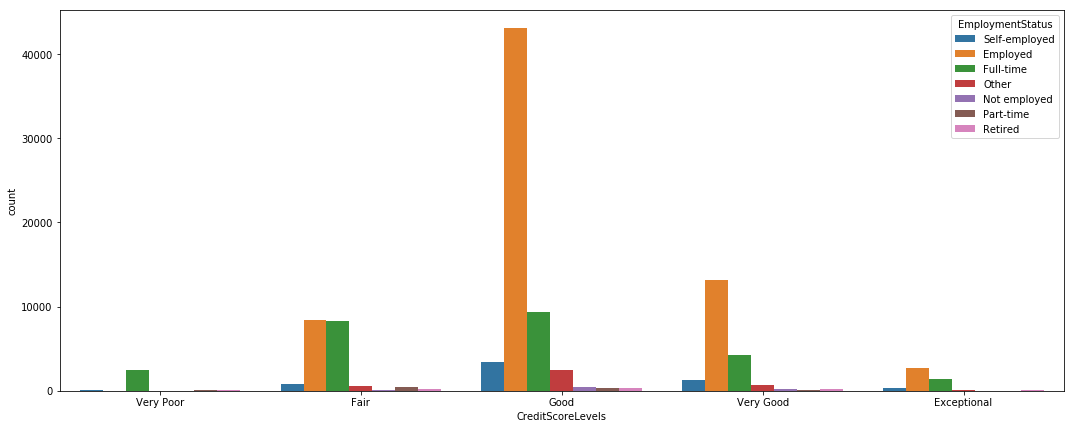

In [56]:
plt.figure(figsize = [18,7])
sb.countplot(data = df, x = 'CreditScoreLevels', hue = 'EmploymentStatus');

The answer for previous question is no, because graphs show there are a direct relation with income increasing and inquiries in bth 6 month and total.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Loan rate and loan APR act similar together for borrowers and both of them decrease when borrower has better credit score or income. But surprisingly inquires either in last 6 months or in total doesn’t have relation with loan amount. It seems they are more related to borrower credit score and put their effect on rate, APR and amount through credit score. Because credit score has an inverse relation with rate and APR and direct relation with loan amount. Another interesting variables for me was borrower homeowner status, which seems not great player in field of loan amount and rate as income, credit and even employment status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is an interesting relation between borrowers income and inquiries. I expected borrowers with lower credit score have lower income range or not employed, but they are most full time employee and second income range. For finding its why, we need more data to figure out an accurate answer.

## Multivariate Exploration

Multivariate Exploration is one of the most exciting part in exploring of this dataset. Graphs and technics in this section help us to figure out how different items effect on each other. Most of the all, I am looking forward to see how `'BorrowerRate'` and `'LoanOriginalAmount'` behave infront of categorical variables (like `'CreditScoreLevels'` and `'IsBorrowerHomeowner'`) and vice versa. I also eager to find out how categorical variables, interact with numeric variables one by one. (mean drawing two cate. vars. and one numeric var. in each graph)
>In most part of this section I used "borrowerRate' variable as this one and 'BorrowerAPR' behave similarly
>As dataset has more than 100k rows, I prefer to don't use faceting technics, because I need a big clear view of each graph to understand interaction between variables

Lets for start a figure to find do homeowner borrowers can get higher loan amount with lower rate?

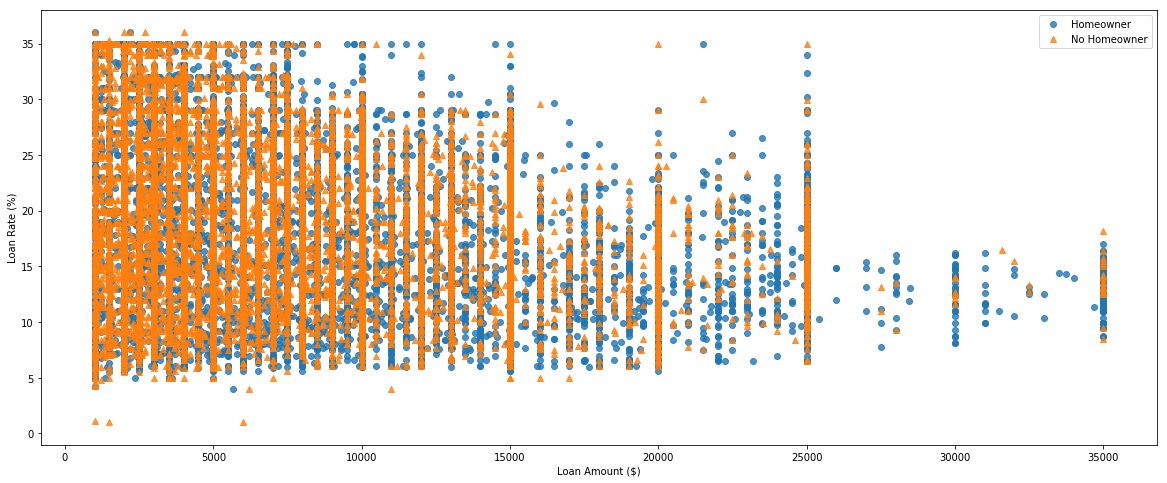

In [45]:
# for less busy result, I used a sample data of dataset
samples = np.random.choice(df.shape[0], 40000, replace = False)
loan_samp = df.loc[samples,:]

ttype_markers = [[True, 'o'],
                 [False, '^']]
for ttype, marker in ttype_markers:
    plot_data = loan_samp.loc[loan_samp['IsBorrowerHomeowner'] == ttype]
    sb.regplot(data = plot_data, x = 'LoanOriginalAmount', y = 'BorrowerRate', fit_reg = False, marker = marker)

# plt.figure(figsize=[20, 8])
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Rate (%)')
plt.legend(['Homeowner', 'No Homeowner']);

Generally we can say a little borrower homeowner could get bigger loan amount with lower rate especially with loan more than $ 20k, but at most concentrate area of data, there is no different between homeowner and not homeowner borrowers.

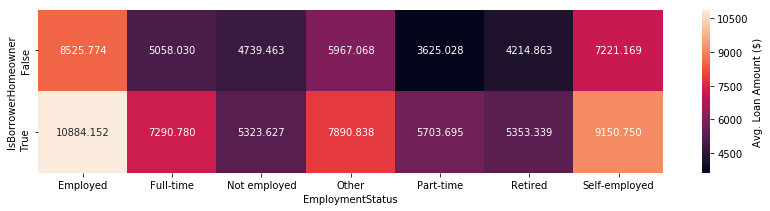

In [55]:
loan_means = df.groupby(['EmploymentStatus', 'IsBorrowerHomeowner']).mean()['LoanOriginalAmount']
loan_means = loan_means.reset_index(name = 'loan_amount_avg')
loan_means = loan_means.pivot(index = 'IsBorrowerHomeowner', columns = 'EmploymentStatus',
                            values = 'loan_amount_avg')
plt.figure(figsize = [14, 3])
sb.heatmap(loan_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Avg. Loan Amount ($)'});

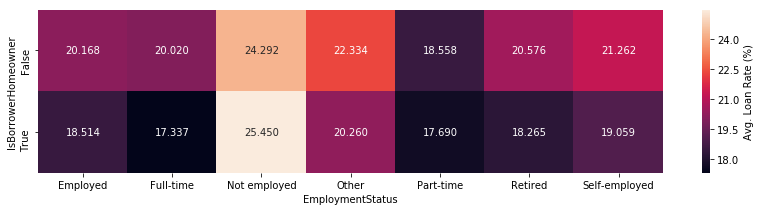

In [56]:
rate_means = df.groupby(['EmploymentStatus', 'IsBorrowerHomeowner']).mean()['BorrowerRate']
rate_means = rate_means.reset_index(name = 'rate_avg')
rate_means = rate_means.pivot(index = 'IsBorrowerHomeowner', columns = 'EmploymentStatus',
                            values = 'rate_avg')
plt.figure(figsize = [14, 3])
sb.heatmap(rate_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Avg. Loan Rate (%)'});

Both above graphs show, in different employment status, homeowner borrower gat higher loan with lower rate.

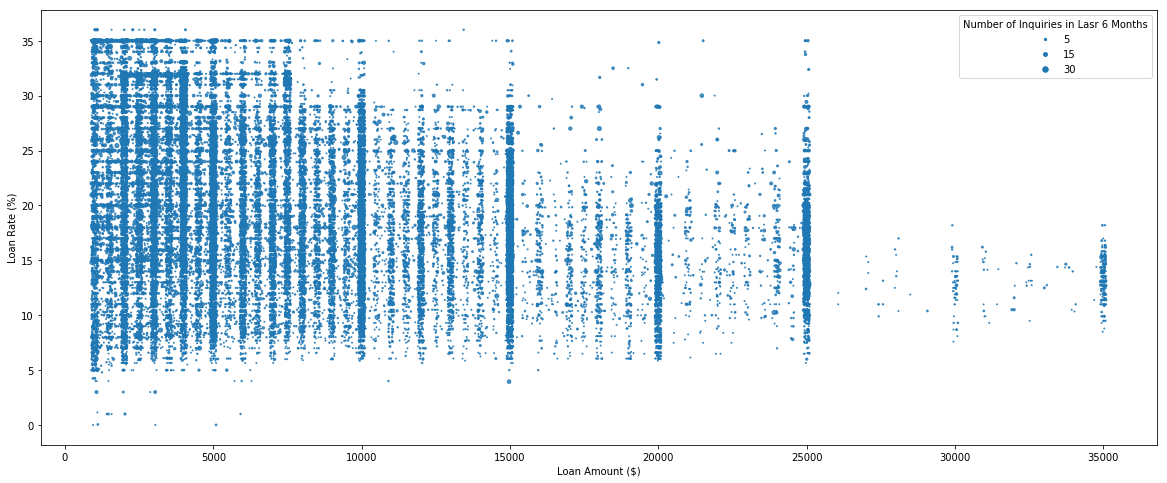

In [48]:
# lets look at Inquiries numbers and loan amount and rate
plt.figure(figsize = [20, 8])
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate',
           x_jitter = 100, fit_reg = False,
           scatter_kws = {'s' : df['InquiriesLast6Months']})
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Rate (%)')

# how put the legend
sizes = [5, 15, 30]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s, color = base_color))
plt.legend(legend_obj, sizes, title = 'Number of Inquiries in Lasr 6 Months');

As we saw in bivariate section, number of inquiries has indirect effect on loam amount and loan rate through credit score. Inn this graph, lower inquiries last 6 month, make higher loan amount and lower loan rate. But, I think it is better to figure out relation between credit score and loan amount and loan rate in different draw for more digging.

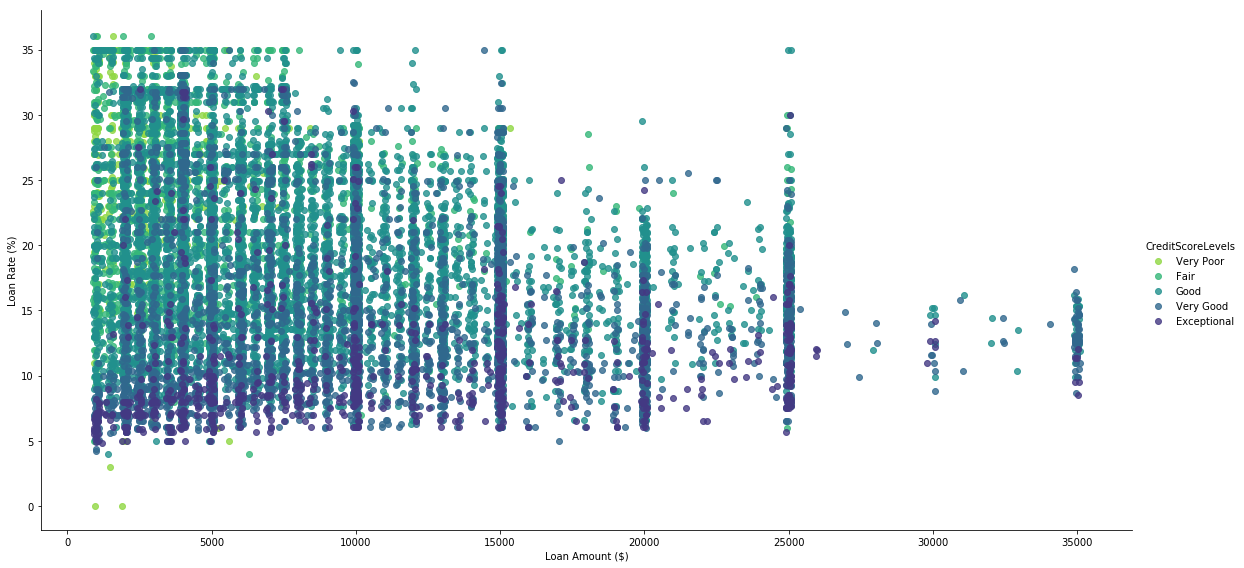

In [24]:
samples = np.random.choice(df.shape[0], 20000, replace = False)
loan_samp = df.loc[samples,:]

g = sb.FacetGrid(data = loan_samp, hue =  'CreditScoreLevels',
               height = 8, aspect = 2, palette = 'viridis_r')
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter = 100, fit_reg = False)
g.add_legend()
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Rate (%)');

As I expected, higher `CreditScoreLevels` could take bigger loan amount with lower rate, this trend specially obvious with lower rate, beside of amount, most down area of our scatter plot, fill with `'Very Good'` and `'Exceptional'` ranks. 

One interesting matter for me, is how 'IncomeRange' and 'CreditScoreLevels' effect on borrowers loan rate and loan amount, So, with following graphs, I'm looking to find out and in first step look at interaction of 'incomeRange' with Loan amount and rate.

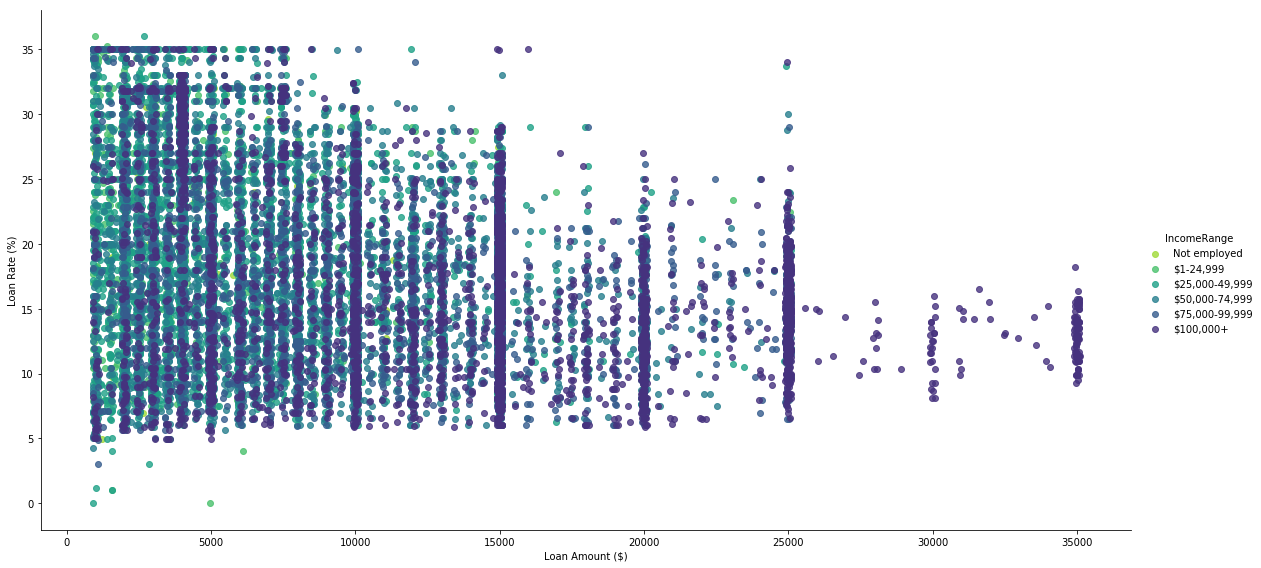

In [20]:
samples = np.random.choice(df.shape[0], 20000, replace = False)
loan_samp = df.loc[samples,:]

g = sb.FacetGrid(data = loan_samp, hue =  'IncomeRange',
               height = 8, aspect = 2, palette = 'viridis_r')
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter = 100, fit_reg = False)
g.add_legend()
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Rate (%)');

Trend of higher income got bigger loan amount with lower rate, is clear for me especially with loan bigger than $ 25k. Lets look at relation of income range and credit score level with loan rate and then loan amount.

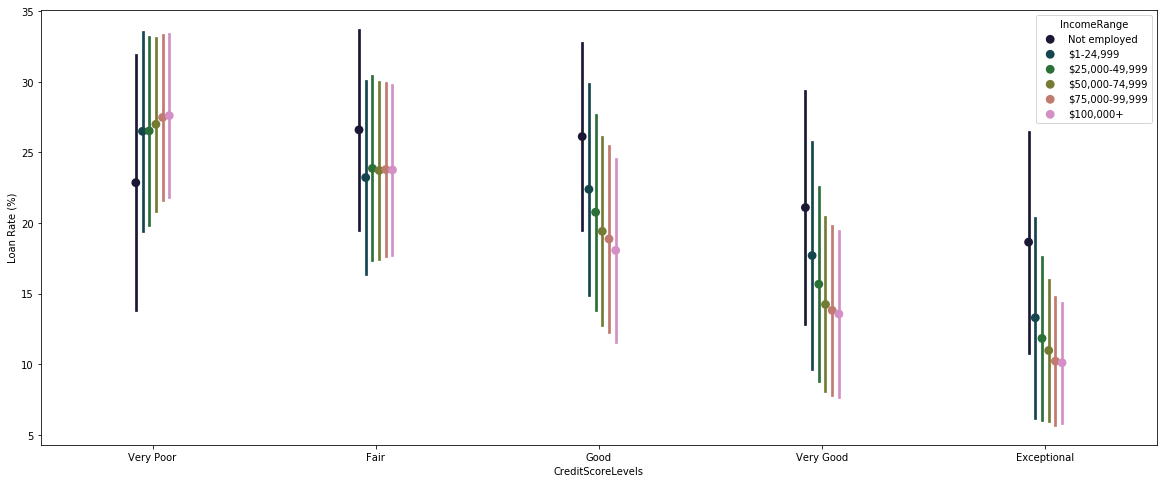

In [12]:
plt.figure(figsize = [20,8])
sb.pointplot(data = df, x='CreditScoreLevels', y = 'BorrowerRate', hue = 'IncomeRange',
             palette = sb.color_palette("cubehelix", 8), ci = 'sd', linestyles = "", dodge = True)
plt.ylabel('Loan Rate (%)');

I expected in all level of 'CreditScoreLevels', borrowers with 'Not employed' value in 'IncomeRange' have higher loan rate. This trend for all levels is true except 'Very Poor' level. In this level, interestingly, 'Not employed' borrower got lower loan rate that the rest levels. Beside this note, rest of graph comply my expectation: higher 'IncomeRange' in all 'CreditScoreLevels'got lower loan rate. Let's to see does this note works for loan amount too or not.

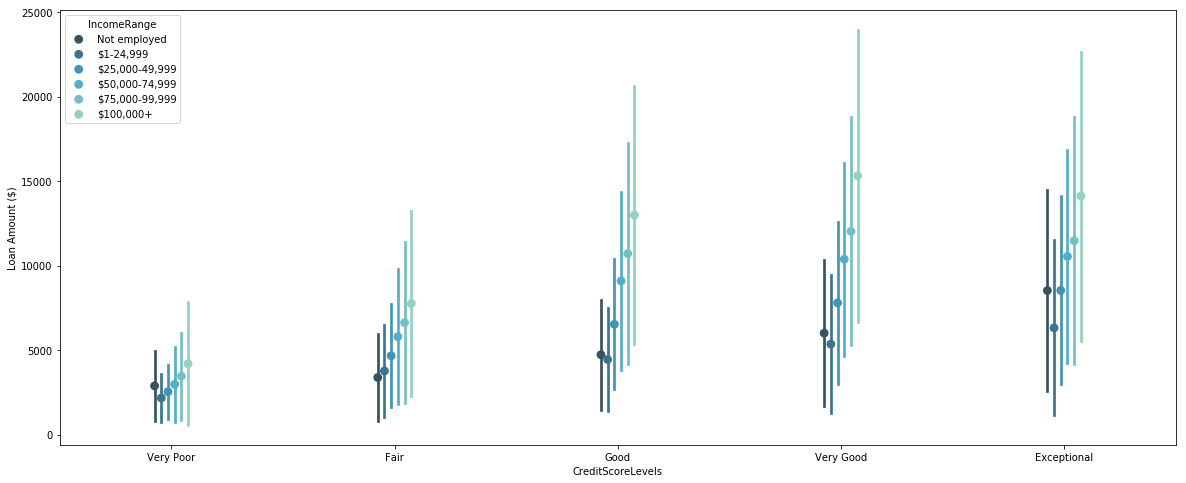

In [52]:
plt.figure(figsize = [20,8])
sb.pointplot(data = df, x='CreditScoreLevels', y = 'LoanOriginalAmount', hue = 'IncomeRange',
             palette = sb.color_palette("GnBu_d"), ci = 'sd', linestyles = "", dodge = True)
plt.ylabel('Loan Amount ($)');

Generally borrowers with higher income range, in all credit score, got higher loan amount except with 'Not employed' value. For this value, it is kind of contradict when borrower is 'Not employed' but has great credit score or when borrower income range, for example, is more than $ 100k and its credit score is 'Very Poor'. As we saw in univariate section, number of borrowers with 'Not employed' value in 'incomeRange' are very little, so maybe we can say, this situation is not a general trend and need more data for each case.

The other variable, interesting for looking is 'Term'. It is wondering that term of loan related to borrowers credit score or more related to loan amount or loan rate. Let’s see how multivariate graphs help to find answer.

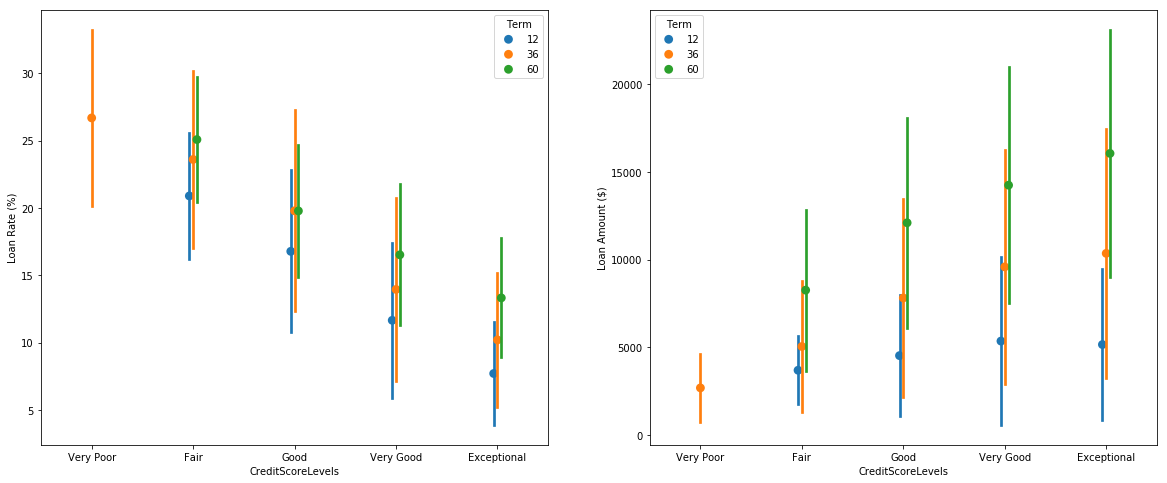

In [5]:
plt.figure(figsize = [20,8])

plt.subplot(1,2,1)
sb.pointplot(data = df, x='CreditScoreLevels', y = 'BorrowerRate', hue = 'Term',
             ci = 'sd', linestyles = "", dodge = True)
plt.ylabel('Loan Rate (%)')

plt.subplot(1,2,2)
sb.pointplot(data = df, x='CreditScoreLevels', y = 'LoanOriginalAmount', hue = 'Term',
             ci = 'sd', linestyles = "", dodge = True)
plt.ylabel('Loan Amount ($)');

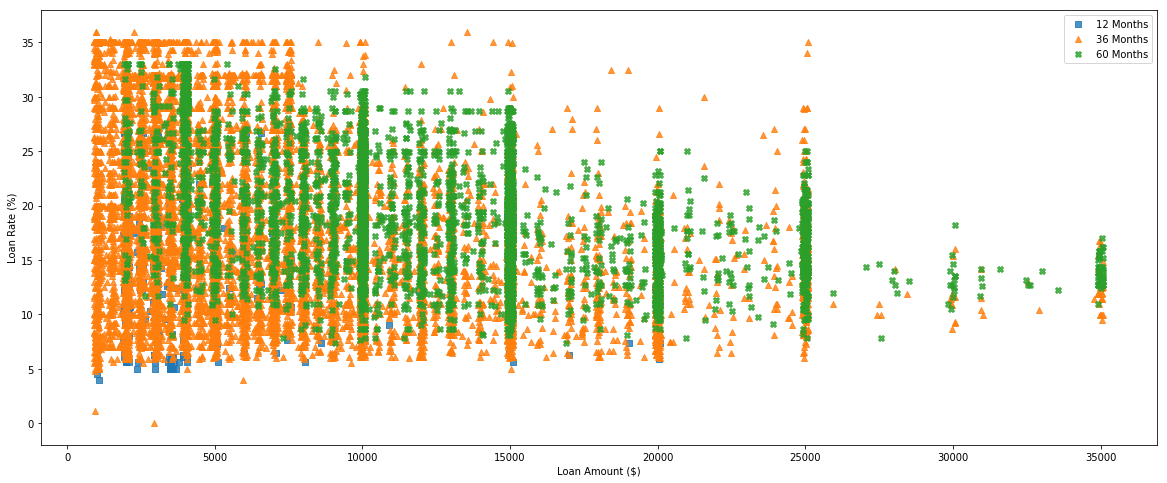

In [35]:
samples = np.random.choice(df.shape[0], 20000, replace = False)
loan_samp = df.loc[samples,:]

ttype_markers = [[12, 's'],[36, '^'],[60, 'X']]
for ttype, marker in ttype_markers:
    plot_data = loan_samp.loc[loan_samp['Term'] == ttype]
    sb.regplot(data = plot_data, x = 'LoanOriginalAmount', y = 'BorrowerRate', x_jitter = 100, 
               fit_reg = False, marker = marker)

# plt.figure(figsize=[20, 8])
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Rate (%)')
plt.legend(['12 Months', '36 Months', '60 Months']);

As both pointplot graphs and scatter plot show, it seems loan term more related to loan amount and loan rate, that means higher loan amount has longer term and lower rate has shorter term. In our dataset there isn't any data from borrower with 'Very Poor' credit score and loan terms 12 or 60 months. So, we can’t compare general trend, for this situation, it is like kind of policy to give borrower in this credit score just 36 loan term and lower than $ 5k loan amount to minimize risk of missed loans.

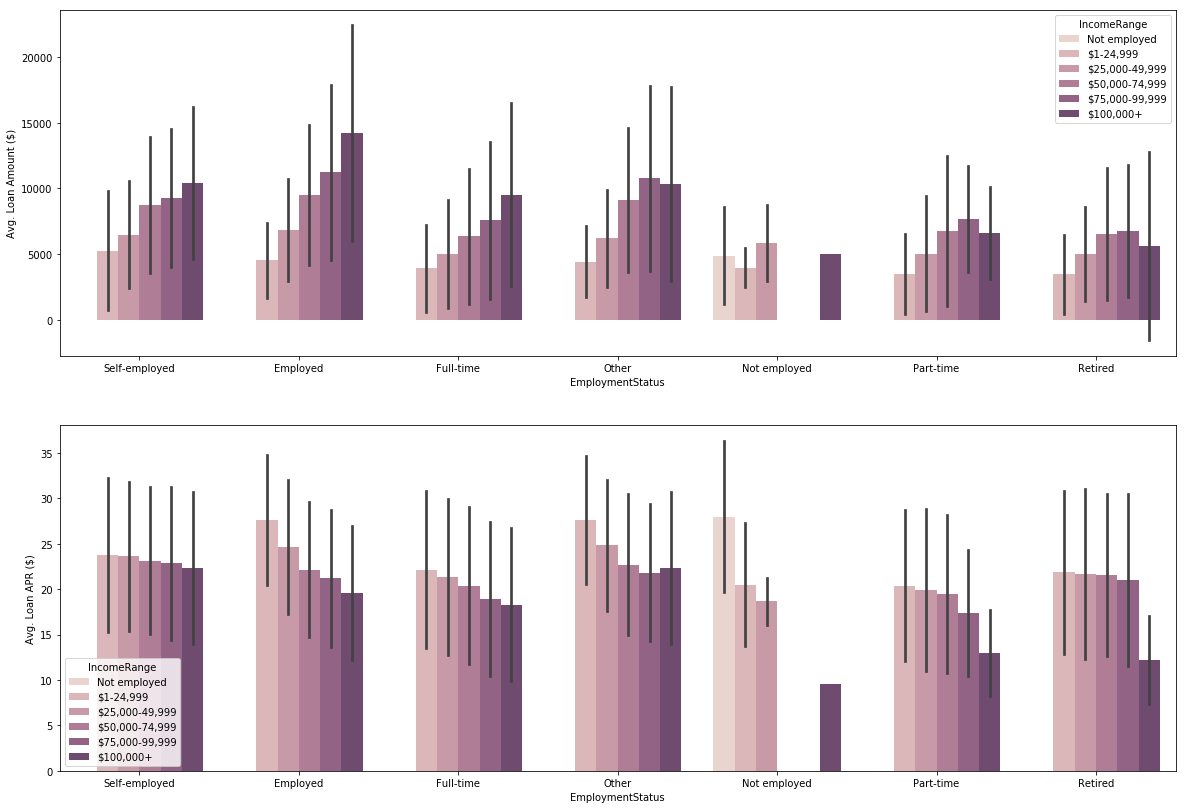

In [55]:
plt.figure(figsize = [20,14])

plt.subplot(2,1,1)
sb.barplot(data = df, x='EmploymentStatus', y = 'LoanOriginalAmount', hue = 'IncomeRange',
             ci = 'sd', palette = sb.cubehelix_palette(8))
plt.ylabel('Avg. Loan Amount ($)');

plt.subplot(2,1,2)
sb.barplot(data = df, x='EmploymentStatus', y = 'BorrowerAPR', hue = 'IncomeRange',
             ci = 'sd', palette = sb.cubehelix_palette(8))
plt.ylabel('Avg. Loan APR ($)');

Both graphs generally are like as we expect. but in 'Part-time' and 'Retired' at first graph, which borrowers with highest income range, $ 100k+, got less loan amount, maybe they request fewer as second graph shows they pay less loan APR

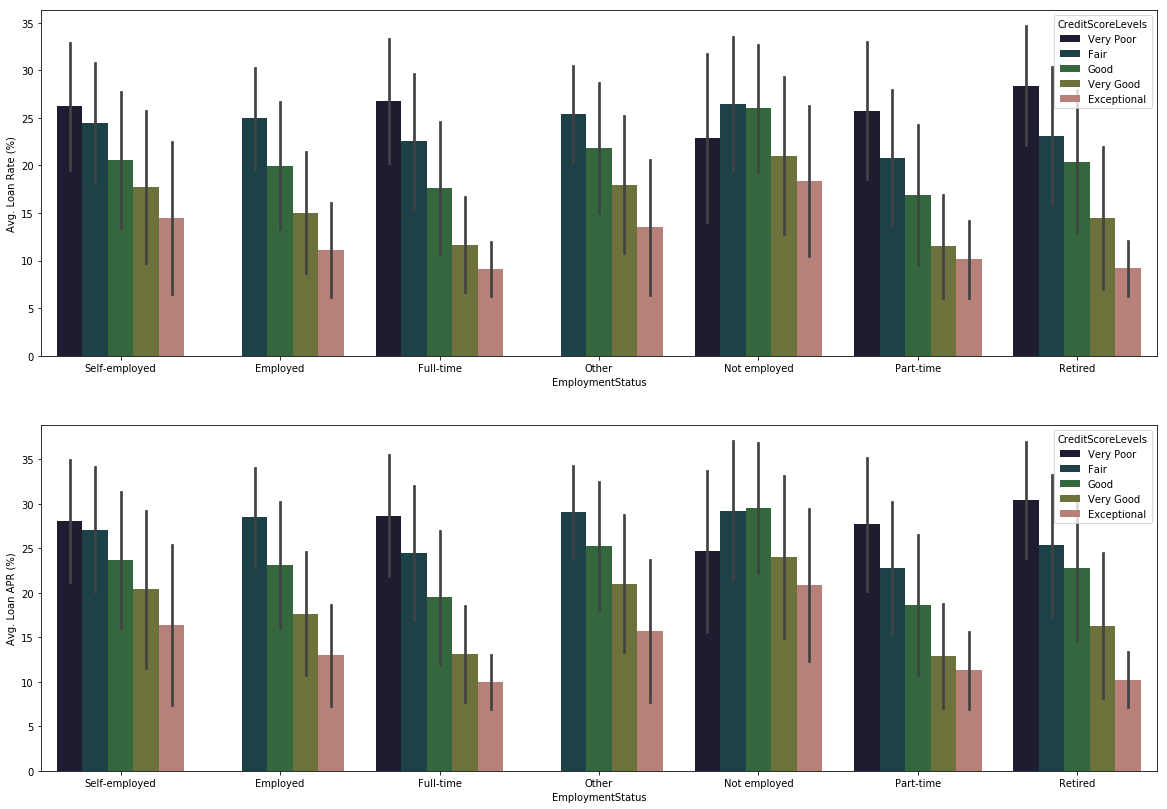

In [25]:
plt.figure(figsize = [20,14])

plt.subplot(2,1,1)
sb.barplot(data = df, x='EmploymentStatus', y = 'BorrowerRate', hue = 'CreditScoreLevels',
           ci = 'sd',  palette = sb.color_palette("cubehelix", 8))
plt.ylabel('Avg. Loan Rate (%)')

plt.subplot(2,1,2)
sb.barplot(data = df, x='EmploymentStatus', y = 'BorrowerAPR', hue = 'CreditScoreLevels',
           ci = 'sd', palette = sb.color_palette("cubehelix", 8))
plt.ylabel('Avg. Loan APR (%)');

Interesting, we have same pattern here for borrowers with 'Very Poor' credit and 'Not employed' status who pay less loan rate rather than better credit score in same 'Not employed' status. In graph which shows 'IncomeRange' against 'CreditScoreLevels' and 'Borrowerrate' we saw same pattern, 'Very Poor' credit pay less rate rather than better credit score in 'Not employed' income range.

It seems if a borrower credit score is very poor, it is better to select 'Not employed' in employment status and income range to get higher loan amount with lower rate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Multivariate exploratory in one of the greatest phase to find relation between different variables. In this phase, first I mostly concentrate on loan amount and loan rate to figure out how these two important characteristics feature of one loan effect from other variables or affect by them. It was, interestingly, be a homeowner not have great impact to get higher loan or lower rate, even loan term seems independent from credit score or employment status and most have logical and financial relation with loan amount and rate.

It can be said generally, higher credit score, employment status and higher income range help borrower to get higher loan with lower rate. 
### Were there any interesting or surprising interactions between features?

I surprisingly found, if borrower credit score is 'Very Poor', it is better to they have 'Not employed' status in 'EmploymentStatus' and ‘IncomeRange' to lower loan rate rather than other borrower in same credit score but better income or 'Employed' status.